In [1]:
# import externals libraries
import os
import shutil
import pickle
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# import the needed OGGM modules
from oggm import cfg, utils, workflow
from oggm.core import gis, climate, flowline, vascaling

In [2]:
# open DataSet
ds = pickle.load(open('/Users/oberrauch/work/master/data/eq_runs/test.nc', mode='rb'))
ds

<xarray.Dataset>
Dimensions:            (normalized: 2, scaling_const: 2, time: 1001, time_scale_factor: 3)
Coordinates:
  * time               (time) float64 0.0 1.0 2.0 3.0 ... 998.0 999.0 1e+03
    hydro_year         (time) int64 0 1 2 3 4 5 6 ... 995 996 997 998 999 1000
    hydro_month        (time) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    calendar_year      (time) int64 -1 0 1 2 3 4 5 ... 994 995 996 997 998 999
    calendar_month     (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10
  * time_scale_factor  (time_scale_factor) float64 0.5 1.0 2.0
  * scaling_const      (scaling_const) object (1.504, 0.244) (4.551, 0.191)
    model              <U3 'vas'
    mb_model           <U8 'constant'
  * normalized         (normalized) bool False True
Data variables:
    volume             (normalized, scaling_const, time_scale_factor, time) float64 7.618e+08 ... 0.8428
    area               (normalized, scaling_const, time_scale_factor, time) float64 8.036e+06 ... 0.883

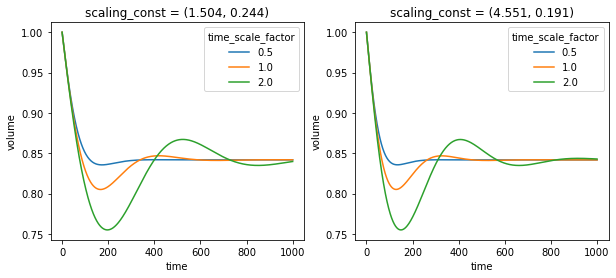

In [4]:
# create figure and axes
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
# select volume and drop all unambiguos coordinates
ds_subset = ds.sel(normalized=True).reset_coords(drop=True)
# select and plot for different time scale factors
for i, ax in enumerate(axes):
    ds_subset.isel(scaling_const=i).volume.plot.line(x='time', ax=ax)

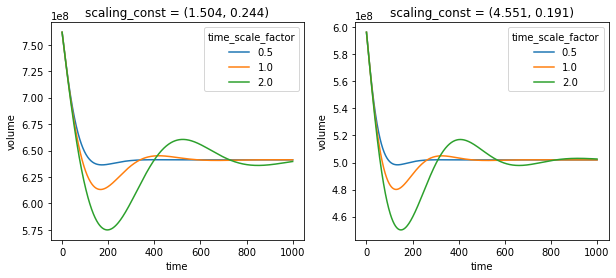

In [6]:
# create figure and axes
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
# select volume and drop all unambiguos coordinates
ds_subset = ds.sel(normalized=False).reset_coords(drop=True)
# select and plot for different time scale factors
for i, ax in enumerate(axes):
    ds_subset.isel(scaling_const=i).volume.plot.line(x='time', ax=ax)

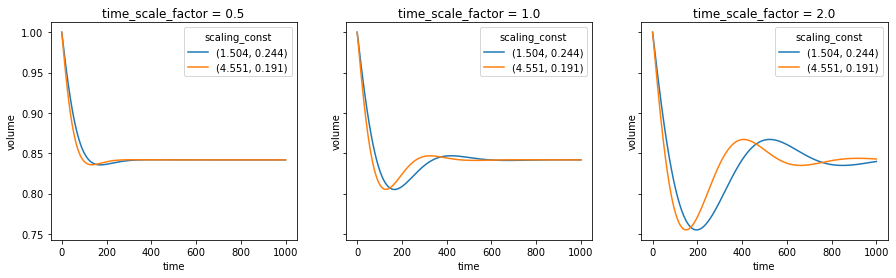

In [5]:
# create figure and axes
f, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
# select volume and drop all unambiguos coordinates
ds_subset = ds.sel(normalized=True).reset_coords(drop=True)
# select and plot for different time scale factors
for i, ax in enumerate(axes):
    ds_subset.isel(time_scale_factor=i).volume.plot.line(x='time', ax=ax)

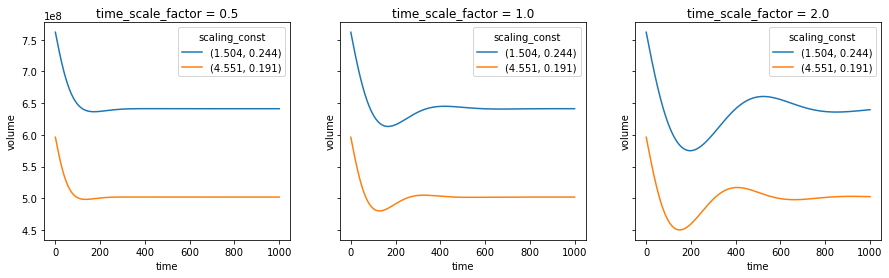

In [7]:
# create figure and axes
f, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
# select volume and drop all unambiguos coordinates
ds_subset = ds.sel(normalized=False).reset_coords(drop=True)
# select and plot for different time scale factors
for i, ax in enumerate(axes):
    ds_subset.isel(time_scale_factor=i).volume.plot.line(x='time', ax=ax)

In [23]:
ds_subset = ds.sel(normalized=False, time_scale_factor=1).reset_coords(drop=True)
initial_vol = ds_subset.volume.isel(time=0)
vol_min = ds_subset.volume.min(dim='time')
vol_max = ds_subset.volume.max(dim='time')
vol_range = vol_max - vol_min
print('Volume range:', vol_range.values)
print('Relative range:', (vol_range/initial_vol).values)
print('Scaling constants:', vol_range.scaling_const.values)

Volume range: [1.48546875e+08 1.16205803e+08]
Relative range: [0.19500412 0.19487878]
Scaling constants: [(1.504, 0.244) (4.551, 0.191)]


In [26]:
print(initial_vol)

<xarray.DataArray 'volume' (scaling_const: 2)>
array([7.617627e+08, 5.962979e+08])
Coordinates:
    time           float64 0.0
  * scaling_const  (scaling_const) object (1.504, 0.244) (4.551, 0.191)


In [29]:
def initial_geometries(area, c_l, c_a, q=2.2, gamma=1.375):
    volume = c_a*area**gamma
    length = (volume/c_l)**(1/q)
    print('Area {:.2f} km2, Volume {:.2f} km3, Length {:.2f} km'.format(area/1e6, volume/1e9, length/1e3))

In [34]:
area_0 = 8.036e+06
initial_geometries(area_0, 4.551, 0.191)
initial_geometries(area_0, , 0.244)

Area 8.04 km2, Volume 0.60 km3, Length 4.89 km
Area 8.04 km2, Volume 0.76 km3, Length 3.74 km


In [44]:
# open DataSet
ds = pickle.load(open('/Users/oberrauch/work/master/data/eq_runs/hef_sensitivity_growth.nc', mode='rb'))

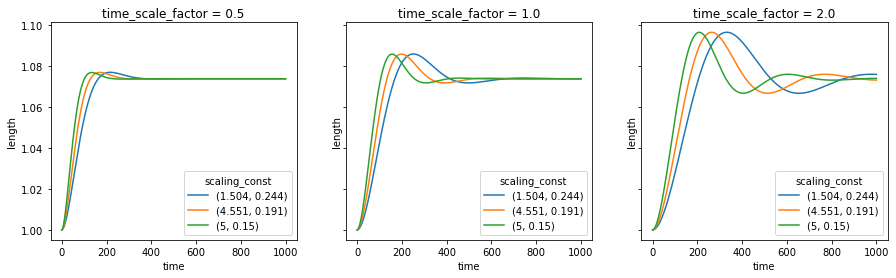

In [199]:
# create figure and axes
f, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
# select volume and drop all unambiguos coordinates
ds_subset = ds.sel(normalized=True).reset_coords(drop=True)
# select and plot for different time scale factors
for i, ax in enumerate(axes):
    ds_subset.isel(time_scale_factor=i).length.plot.line(x='time', ax=ax)
    

In [48]:
ds_subset = ds.sel(normalized=False, time_scale_factor=1).reset_coords(drop=True)
initial_vol = ds_subset.length.isel(time=0)
final_vol = ds_subset.length.isel(time=-1)
vol_min = ds_subset.length.min(dim='time')
vol_max = ds_subset.length.max(dim='time')
vol_range = vol_max - vol_min
print('length range (min-max):', vol_range.values)
print('length range (init-eq):', (final_vol-initial_vol).values)
print('Relative range:', (vol_range/initial_vol).values)
print('Scaling constants:', vol_range.scaling_const.values)

length range (min-max): [777.45817503 420.3489307  360.69030012]
length range (init-eq): [667.43007711 361.30596773 310.1343215 ]
Relative range: [0.08591192 0.08588206 0.08584245]
Scaling constants: [(1.504, 0.244) (4.551, 0.191) (5, 0.15)]


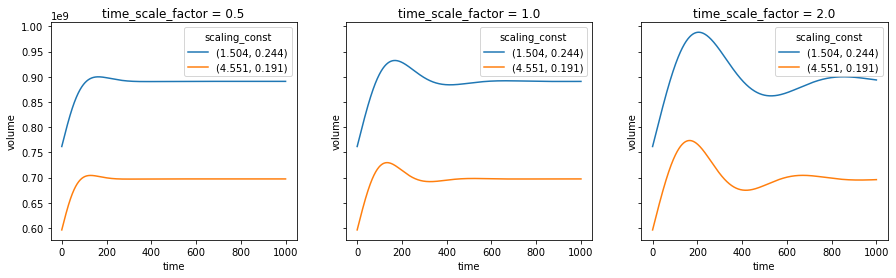

In [39]:
# create figure and axes
f, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
# select volume and drop all unambiguos coordinates
ds_subset = ds.sel(normalized=False).reset_coords(drop=True)
# select and plot for different time scale factors
for i, ax in enumerate(axes):
    ds_subset.isel(time_scale_factor=i).volume.plot.line(x='time', ax=ax)

In [43]:
ds_subset = ds.sel(normalized=False, time_scale_factor=1).reset_coords(drop=True)
initial_vol = ds_subset.volume.isel(time=0)
final_vol = ds_subset.volume.isel(time=-1)
vol_min = ds_subset.volume.min(dim='time')
vol_max = ds_subset.volume.max(dim='time')
vol_range = vol_max - vol_min
print('Volume range (min-max):', vol_range.values)
print('Volume range (init-eq):', (final_vol-initial_vol).values)
print('Relative range:', (vol_range/initial_vol).values)
print('Scaling constants:', vol_range.scaling_const.values)

Volume range (min-max): [1.70627134e+08 1.33466657e+08]
Volume range (init-eq): [1.29109697e+08 1.01144186e+08]
Relative range: [0.22398986 0.22382548]
Scaling constants: [(1.504, 0.244) (4.551, 0.191)]


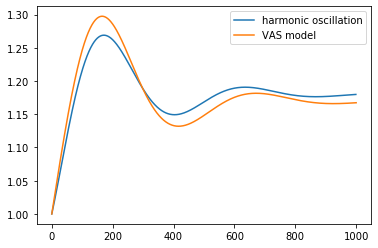

In [178]:
def dampend_harmonic_oscillation(t, ang_freq=1/70, damping_rate=0.32, amplitude=0.18, phase=np.pi/2+0.5):
    x = amplitude * (1-np.exp(-damping_rate * ang_freq * t) * np.sin(np.sqrt(1-damping_rate**2)*ang_freq*t+phase) / np.sin(phase))
    return x + 1

t = np.arange(0,1000,1)
plt.plot(t, dampend_harmonic_oscillation(t), label='harmonic oscillation')
plt.plot(ds.sel(normalized=True).isel(time_scale_factor=2, scaling_const=1).volume.values, label='VAS model')
plt.legend()

In [181]:
def trend_solution(t, tau, alpha, beta, temp_trend, precip_trend):
    return tau*(alpha*temp_trend + beta*precip_trend)*(t-tau*(1-np.exp(-t/tau)))

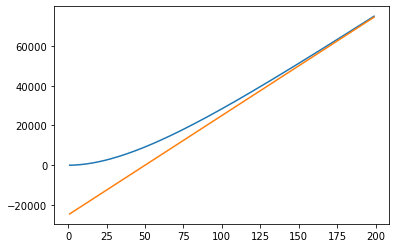

In [188]:
t = np.arange(1,200)

tau = 50
alpha =  -100
beta = 180
temp_trend = -0.1
precip_trend = 0

plt.plot(t, trend_solution(t, tau, alpha, beta, temp_trend, precip_trend))
plt.plot(t, (t-tau)*(tau*(alpha*temp_trend + beta*precip_trend)))

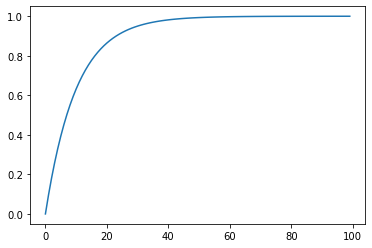

In [198]:
plt.plot(1-np.exp(-np.arange(0, 10, 0.1)))